## Assignment 1a: Machine Learning Methods

### \<Christian Ataiza> \<a1882443>

#### How can we use data analytics to predict energy usage for this house?

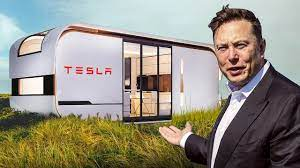

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

# 1. Read the dataset

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading in the dataset

In [2]:
# loading in the dataset
# visualize the entire table including all columns
pd.set_option('display.max_columns', None)
df = pd.read_csv(r'energydata_complete.csv') 
df['date'] = pd.to_datetime(df.date, format = "%d/%m/%Y %H:%M")


In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [28]:
# view the feature names
columns = df.columns
columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [4]:
# view the size of the dataframe
df.shape

(19735, 29)

## Check for Missing Data

In [13]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

It can be seen that there is no need to impute for missing data since the dataset has no missing data.

# 2. Analyse and visualise the data

## Exploratory Data Analysis

### Data Dictionary

| Data variables                        | Feature Name in Table | Units           |
|----------------------------------------|-----------------------|-----------------|
| Datetime stamp | dd-mm-yy hh:ss | date                   |
| Appliances energy consumption          | appliances            | Wh              |
| Light energy consumption               | light                 | Wh              |
| T1, Temperature in kitchen area        | T1                    | °C              |
| RH1, Humidity in kitchen area          | RH_1                  | %               |
| T2, Temperature in living room area    | T2                    | °C              |
| RH2, Humidity in living room area      | RH_2                  | %               |
| T3, Temperature in laundry room area   | T3                    | °C              |
| RH3, Humidity in laundry room area     | RH_3                  | %               |
| T4, Temperature in office room         | T4                    | °C              |
| RH4, Humidity in office room           | RH_4                  | %               |
| T5, Temperature in bathroom            | T5                    | °C              |
| RH5, Humidity in bathroom              | RH_5                  | %               |
| T6, Temperature outside the building (north side) | T6      | °C              |
| RH6, Humidity outside the building (north side)   | RH_6    | %               |
| T7, Temperature in ironing room        | T7                    | °C              |
| RH7, Humidity in ironing room          | RH_7                  | %               |
| T8, Temperature in teenager room 2     | T8                    | °C              |
| RH8, Humidity in teenager room 2       | RH_8                  | %               |
| T9, Temperature in parents room        | T9                    | °C              |
| RH9, Humidity in parents room          | RH_9                  | %               |
| To, Temperature outside (from Chièvres weather station) | T_out | °C              |
| Pressure (from Chièvres weather station) | Press_mm_hg         | mm Hg           |
| RHo, Humidity outside (from Chièvres weather station) | RH_out   | %           |
| Windspeed (from Chièvres weather station) | Windspeed           | m/s             |
| Visibility (from Chièvres weather station) | Visbility           | km              |
| Tdewpoint (from Chièvres weather station) | Tdewpoint           | °C              |
| Random Variable 1 (RV 1)               | rv1                   | Non-dimensional |
| Random Variable 2 (RV 2)               | rv2                   | Non-dimensional |


### Identify the data types of each variable

It can be observed that in the dictionary and in the data types that the values of each variable is continuous. 

In [5]:
df.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

### Visualize Distributions

### Visualize Correlations

# 3. Pre-process the data

# 4. Implement, train and test prediction models

# 5. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

# 6. Reflect on what you have learned by completing this assignment and how to improve the models

# 7. References